In [6]:
# Lets do some machine learning...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# get the dataset (interpolated to every datapoint to take advantage of several features)
# load the pre cleaned data from GreenhouseGassesDataCleaning.ipynb
dataset = pd.read_csv('dataset_interpolated.csv')
dataset.set_index('Year (negative values = BC)', inplace = True)
dataset.head()

,Temp interpolated,CO2 interpolated,N2O interpolated,Methane interpolated
Year (negative values = BC),,,,
-796475,-8.603333,190.133333,254.000000,443.175
-796467,-8.666667,189.700000,253.257143,457.800
-795458,-8.730000,189.266667,252.514286,426.950
-795327,-8.680000,188.833333,251.771429,396.100
-795149,-8.630000,188.400000,251.028571,400.480


In [11]:
# Train Test Split

In [12]:
dataset.shape

(10027, 4)

In [13]:
y = dataset["Temp interpolated"]
X = dataset.drop("Temp interpolated", axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [14]:
# Scale the data

In [43]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled = X_scaler.transform(X)

In [8]:
# SVM doesn't work because I'm working with continous classification data not simple classifiers

#model = SVC(kernel='rbf', gamma = "scale", C=1)
#model.fit(X_train_scaled, y_train)
#modelL=SVC(kernel='linear', C = 1)
#modelL.fit(X_train_scaled, y_train)

In [9]:
# Lets do support vector REGRESSION
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [10]:
# train the SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_rbf.fit(X_train_scaled, y_train)
svr_lin.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
print(f"RBF Training Data Score: {svr_rbf.score(X_train_scaled, y_train)}")
print(f"RBF Testing Data Score: {svr_rbf.score(X_test_scaled, y_test)}")
print(f"Linear Training Data Score: {svr_lin.score(X_train_scaled, y_train)}")
print(f"Linear Testing Data Score: {svr_lin.score(X_test_scaled, y_test)}")
print(f"Poly Training Data Score: {svr_poly.score(X_train_scaled, y_train)}")
print(f"Poly Testing Data Score: {svr_poly.score(X_test_scaled, y_test)}")

RBF Training Data Score: 0.8526287261166059
RBF Testing Data Score: 0.8672130340583855
Linear Training Data Score: 0.7991833381089111
Linear Testing Data Score: 0.8420229549649072
Poly Training Data Score: 0.8602618562191959
Poly Testing Data Score: 0.8735088734176487


In [12]:
# Great, seems okay so far
# Do some hyperparameter testing

In [13]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel': ['rbf'], 'C': [1, 10, 100, 1000, 5000], 'gamma': [0.001, 0.01, 0.1, "scale"]},
             {'kernel': ['linear'], 'C': [1, 10, 100, 1000, 5000]},
             {'kernel': ['poly'], 'C':[1, 10, 100, 1000, 5000], 'gamma': [.001, .01, .1, 'scale'], 'degree': [2,3,4], 'coef0': [0,1]}]

grid = GridSearchCV(SVR(), param_grid, verbose=3)

In [14]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 145 candidates, totalling 435 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\caeeb\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.09854448638366309, total=   2.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.08121456774526392, total=   2.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.1009352729516364, total=   2.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.6365142640741751, total=   2.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.6287377515888061, total=   2.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.6364597939016003, total=   2.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.8202072973390044, total=   2.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.8098150232388349, total=   2.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.804319371919918, total=   2.0s
[CV] C=1, gamma=scale, kernel=rbf ..................

[CV]  C=5000, gamma=scale, kernel=rbf, score=0.8915907594212232, total=  20.7s
[CV] C=5000, gamma=scale, kernel=rbf .................................
[CV]  C=5000, gamma=scale, kernel=rbf, score=0.8799227947612763, total=  19.1s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8058954417843096, total=   1.2s
[CV] C=1, kernel=linear ..............................................
[CV] ...... C=1, kernel=linear, score=0.796819367702974, total=   1.1s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.7901385411060052, total=   1.1s
[CV] C=10, kernel=linear .............................................
[CV] ..... C=10, kernel=linear, score=0.806444829482488, total=   1.4s
[CV] C=10, kernel=linear .............................................
[CV] .... C=10, kernel=linear, score=0.7982837133494773, total=   1.3s
[CV] C=10, kernel=linear ....................................

[CV]  C=1, coef0=0, degree=4, gamma=scale, kernel=poly, score=0.6777540598407041, total=   1.9s
[CV] C=1, coef0=1, degree=2, gamma=0.001, kernel=poly ................
[CV]  C=1, coef0=1, degree=2, gamma=0.001, kernel=poly, score=0.0986466149462546, total=   1.6s
[CV] C=1, coef0=1, degree=2, gamma=0.001, kernel=poly ................
[CV]  C=1, coef0=1, degree=2, gamma=0.001, kernel=poly, score=0.08131843365282608, total=   1.6s
[CV] C=1, coef0=1, degree=2, gamma=0.001, kernel=poly ................
[CV]  C=1, coef0=1, degree=2, gamma=0.001, kernel=poly, score=0.10104135283281446, total=   1.5s
[CV] C=1, coef0=1, degree=2, gamma=0.01, kernel=poly .................
[CV]  C=1, coef0=1, degree=2, gamma=0.01, kernel=poly, score=0.6368993366556377, total=   1.5s
[CV] C=1, coef0=1, degree=2, gamma=0.01, kernel=poly .................
[CV]  C=1, coef0=1, degree=2, gamma=0.01, kernel=poly, score=0.6302814808685737, total=   1.5s
[CV] C=1, coef0=1, degree=2, gamma=0.01, kernel=poly ................

[CV]  C=10, coef0=0, degree=3, gamma=0.001, kernel=poly, score=-0.041879301115673506, total=   1.5s
[CV] C=10, coef0=0, degree=3, gamma=0.001, kernel=poly ...............
[CV]  C=10, coef0=0, degree=3, gamma=0.001, kernel=poly, score=-0.021574238687331437, total=   1.5s
[CV] C=10, coef0=0, degree=3, gamma=0.01, kernel=poly ................
[CV]  C=10, coef0=0, degree=3, gamma=0.01, kernel=poly, score=-0.02377983540539086, total=   1.5s
[CV] C=10, coef0=0, degree=3, gamma=0.01, kernel=poly ................
[CV]  C=10, coef0=0, degree=3, gamma=0.01, kernel=poly, score=-0.04113911521448954, total=   1.5s
[CV] C=10, coef0=0, degree=3, gamma=0.01, kernel=poly ................
[CV]  C=10, coef0=0, degree=3, gamma=0.01, kernel=poly, score=-0.020914118713202257, total=   1.5s
[CV] C=10, coef0=0, degree=3, gamma=0.1, kernel=poly .................
[CV]  C=10, coef0=0, degree=3, gamma=0.1, kernel=poly, score=0.3256666147684223, total=   1.5s
[CV] C=10, coef0=0, degree=3, gamma=0.1, kernel=poly ..

[CV]  C=10, coef0=1, degree=4, gamma=0.001, kernel=poly, score=0.739074437832158, total=   1.5s
[CV] C=10, coef0=1, degree=4, gamma=0.01, kernel=poly ................
[CV]  C=10, coef0=1, degree=4, gamma=0.01, kernel=poly, score=0.8057765576056899, total=   1.4s
[CV] C=10, coef0=1, degree=4, gamma=0.01, kernel=poly ................
[CV]  C=10, coef0=1, degree=4, gamma=0.01, kernel=poly, score=0.7949925033859699, total=   1.4s
[CV] C=10, coef0=1, degree=4, gamma=0.01, kernel=poly ................
[CV]  C=10, coef0=1, degree=4, gamma=0.01, kernel=poly, score=0.7891373443867206, total=   1.4s
[CV] C=10, coef0=1, degree=4, gamma=0.1, kernel=poly .................
[CV]  C=10, coef0=1, degree=4, gamma=0.1, kernel=poly, score=0.8514390536347833, total=   1.4s
[CV] C=10, coef0=1, degree=4, gamma=0.1, kernel=poly .................
[CV]  C=10, coef0=1, degree=4, gamma=0.1, kernel=poly, score=0.8479416489519018, total=   1.5s
[CV] C=10, coef0=1, degree=4, gamma=0.1, kernel=poly .................


[CV]  C=100, coef0=1, degree=2, gamma=0.01, kernel=poly, score=0.808032009438881, total=   1.3s
[CV] C=100, coef0=1, degree=2, gamma=0.01, kernel=poly ...............
[CV]  C=100, coef0=1, degree=2, gamma=0.01, kernel=poly, score=0.8004690890396553, total=   1.4s
[CV] C=100, coef0=1, degree=2, gamma=0.01, kernel=poly ...............
[CV]  C=100, coef0=1, degree=2, gamma=0.01, kernel=poly, score=0.7927611250967479, total=   1.4s
[CV] C=100, coef0=1, degree=2, gamma=0.1, kernel=poly ................
[CV]  C=100, coef0=1, degree=2, gamma=0.1, kernel=poly, score=0.8525298894297165, total=   1.5s
[CV] C=100, coef0=1, degree=2, gamma=0.1, kernel=poly ................
[CV]  C=100, coef0=1, degree=2, gamma=0.1, kernel=poly, score=0.8491790635114046, total=   1.5s
[CV] C=100, coef0=1, degree=2, gamma=0.1, kernel=poly ................
[CV]  C=100, coef0=1, degree=2, gamma=0.1, kernel=poly, score=0.8429831927008234, total=   1.6s
[CV] C=100, coef0=1, degree=2, gamma=scale, kernel=poly ...........

[CV]  C=1000, coef0=0, degree=3, gamma=0.01, kernel=poly, score=0.02285898287930077, total=   1.5s
[CV] C=1000, coef0=0, degree=3, gamma=0.01, kernel=poly ..............
[CV]  C=1000, coef0=0, degree=3, gamma=0.01, kernel=poly, score=0.04236348835634485, total=   1.5s
[CV] C=1000, coef0=0, degree=3, gamma=0.1, kernel=poly ...............
[CV]  C=1000, coef0=0, degree=3, gamma=0.1, kernel=poly, score=0.7571652707333516, total=   1.5s
[CV] C=1000, coef0=0, degree=3, gamma=0.1, kernel=poly ...............
[CV]  C=1000, coef0=0, degree=3, gamma=0.1, kernel=poly, score=0.7262782862329249, total=   1.4s
[CV] C=1000, coef0=0, degree=3, gamma=0.1, kernel=poly ...............
[CV]  C=1000, coef0=0, degree=3, gamma=0.1, kernel=poly, score=0.7179811422364676, total=   1.4s
[CV] C=1000, coef0=0, degree=3, gamma=scale, kernel=poly .............
[CV]  C=1000, coef0=0, degree=3, gamma=scale, kernel=poly, score=0.807448345020692, total=  43.0s
[CV] C=1000, coef0=0, degree=3, gamma=scale, kernel=poly .

[CV]  C=1000, coef0=1, degree=4, gamma=0.01, kernel=poly, score=0.8417541936047847, total=   1.9s
[CV] C=1000, coef0=1, degree=4, gamma=0.1, kernel=poly ...............
[CV]  C=1000, coef0=1, degree=4, gamma=0.1, kernel=poly, score=0.8630803517120217, total=   3.6s
[CV] C=1000, coef0=1, degree=4, gamma=0.1, kernel=poly ...............
[CV]  C=1000, coef0=1, degree=4, gamma=0.1, kernel=poly, score=0.8620652732391751, total=   3.2s
[CV] C=1000, coef0=1, degree=4, gamma=0.1, kernel=poly ...............
[CV]  C=1000, coef0=1, degree=4, gamma=0.1, kernel=poly, score=0.8536347281272346, total=   4.0s
[CV] C=1000, coef0=1, degree=4, gamma=scale, kernel=poly .............
[CV]  C=1000, coef0=1, degree=4, gamma=scale, kernel=poly, score=0.8806141781158632, total= 1.4min
[CV] C=1000, coef0=1, degree=4, gamma=scale, kernel=poly .............
[CV]  C=1000, coef0=1, degree=4, gamma=scale, kernel=poly, score=0.8863354384853838, total= 1.6min
[CV] C=1000, coef0=1, degree=4, gamma=scale, kernel=poly .

[CV]  C=5000, coef0=1, degree=2, gamma=0.1, kernel=poly, score=0.860816765144058, total=   6.4s
[CV] C=5000, coef0=1, degree=2, gamma=0.1, kernel=poly ...............
[CV]  C=5000, coef0=1, degree=2, gamma=0.1, kernel=poly, score=0.860141190644034, total=   5.7s
[CV] C=5000, coef0=1, degree=2, gamma=0.1, kernel=poly ...............
[CV]  C=5000, coef0=1, degree=2, gamma=0.1, kernel=poly, score=0.8508618829680475, total=   7.2s
[CV] C=5000, coef0=1, degree=2, gamma=scale, kernel=poly .............
[CV]  C=5000, coef0=1, degree=2, gamma=scale, kernel=poly, score=0.8605123160035506, total= 1.3min
[CV] C=5000, coef0=1, degree=2, gamma=scale, kernel=poly .............
[CV]  C=5000, coef0=1, degree=2, gamma=scale, kernel=poly, score=0.8608432262999725, total= 1.5min
[CV] C=5000, coef0=1, degree=2, gamma=scale, kernel=poly .............
[CV]  C=5000, coef0=1, degree=2, gamma=scale, kernel=poly, score=0.8515851595165608, total= 1.5min
[CV] C=5000, coef0=1, degree=3, gamma=0.001, kernel=poly ..

[Parallel(n_jobs=1)]: Done 435 out of 435 | elapsed: 94.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000, 5000], 'gamma': [0.001, 0.01, 0.1, 'scale']}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000, 5000]}, {'kernel': ['poly'], 'C': [1, 10, 100, 1000, 5000], 'gamma': [0.001, 0.01, 0.1, 'scale'], 'degree': [2, 3, 4], 'coef0': [0, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5000, 'gamma': 'scale', 'kernel': 'rbf'}
0.8849896606993941


In [16]:
best_model = SVR(kernel='rbf', C=5000, gamma='scale')
best_model.fit(X_train_scaled, y_train)

SVR(C=5000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(best_model, 'saved_model.pkl')

['saved_model.pkl']

In [18]:
# Load the pickle file
from sklearn.externals import joblib
from sklearn.svm import SVR
model_load = joblib.load('saved_model.pkl')

In [19]:
# Check that the loaded model is the same as the original
if best_model.score(X, y) == model_load.score(X, y):
    print("saved model is the same!")

saved model is the same!


In [20]:
# lets look at some plots of the predicted vs actual temps

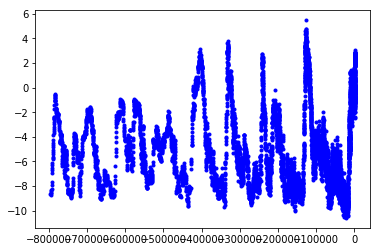

In [21]:
plt.plot(y_train, 'b.')

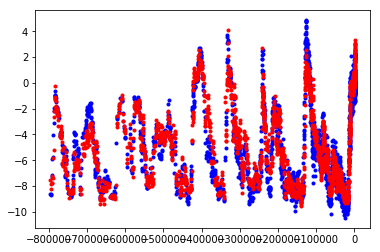

In [22]:
plt.plot(y_test, 'b.')
plt.plot(y_test.index, model_load.predict(X_test_scaled),'r.')

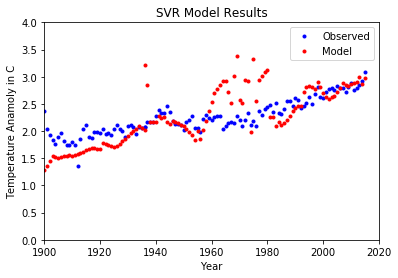

In [49]:
plt.plot(y, 'b.', label='Observed')
plt.plot(y.index, model_load.predict(X_scaled),'r.', label='Model')
plt.xlabel('Year')
plt.ylabel('Temperature Anamoly in C')
plt.title('SVR Model Results')
plt.xlim(1900, 2020)
plt.ylim(0, 4)
plt.legend()
plt.savefig('recent prediction_svr')

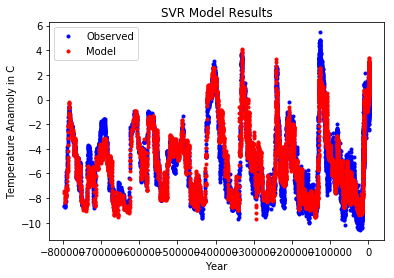

In [50]:
plt.plot(y, 'b.', label='Observed')
plt.plot(y.index, model_load.predict(X_scaled),'r.', label='Model')
plt.xlabel('Year')
plt.ylabel('Temperature Anamoly in C')
plt.title('SVR Model Results')
plt.legend()
plt.savefig('prediction_svr')

In [24]:
# does this help us plot the future?
# upload possible future greenhouse gas options and predict future temperatures:

In [25]:
X_predict_20 = pd.read_csv('predicted_greenhouse_20.csv').set_index('Years Predicted')
X_predict_100 = pd.read_csv('predicted_greenhouse_100.csv').set_index('Years Predicted')

In [26]:
X_predict_20_scaled = X_scaler.transform(X_predict_20)
X_predict_100_scaled = X_scaler.transform(X_predict_100)

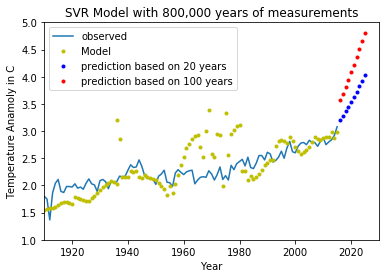

In [58]:
recent = dataset.drop(dataset[dataset.index < 1900].index)
plt.plot(recent['Temp interpolated'], label='observed')
plt.plot(y.index, model_load.predict(X_scaled),'y.', label='Model')
plt.plot(X_predict_20.index, model_load.predict(X_predict_20_scaled), 'b.', label='prediction based on 20 years')
plt.plot(X_predict_100.index, model_load.predict(X_predict_100_scaled), 'r.', label='prediction based on 100 years')
plt.xlabel('Year')
plt.ylabel('Temperature Anamoly in C')
plt.title('SVR Model with 800,000 years of measurements')
plt.legend()
plt.xlim(1910, 2030)
plt.ylim(1, 5)
plt.savefig('future_prediction_svr.png')